In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt

In [3]:
from src.utils.load_processed_data import load_glass
from src.naive_bayes import GaussianNaiveBayes, NaiveBayes
from src.evaluators import MetricsEvaluator
from src.cross_validation import CrossValidator

In [4]:
import tqdm

# Experiments

In [5]:
data = load_glass()
X, Y = data

In [6]:
len(X)

214

In [7]:
tested_kfolds = [2, 3, 5, 7, 10, 15, 20, 30, 50, 100, len(X)]
nb_repetitions = 30

## CV

In [8]:
%%time
results = []

for k in tqdm.tqdm(tested_kfolds):
    kfold_results = []
    for _ in range(nb_repetitions):
        cv = CrossValidator(X, Y, 
                            lambda: GaussianNaiveBayes())
                            #lambda: NaiveBayes(zero_frequency_fill=True))
        metr_evals = cv.kfold_cross_validation(k)
        kfold_results += metr_evals
    results.append(kfold_results)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [01:28<00:00,  8.04s/it]


Wall time: 1min 28s


In [9]:
len(results)

11

In [10]:
sum([len(r) for r in results])

13680

In [11]:
avg_metrics = pd.DataFrame({'Number of Folds':tested_kfolds})
avg_metrics

,Number of Folds
0,2
1,3
2,5
3,7
4,10
5,15
6,20
7,30
8,50
9,100


In [12]:
accuracies = [np.asarray([m.accuracy() for m in res]) for res in results]
avg_metrics['Accuracy Avg'] = [x.mean() for x in accuracies]
avg_metrics['Accuracy Std'] = [x.std() for x in accuracies]

In [13]:
precisions = [np.asarray([m.precision() for m in res]) for res in results]
avg_metrics['Precision Avg'] = [x.mean() for x in precisions]
avg_metrics['Precision Std'] = [x.std() for x in precisions]

C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
recalls = [np.asarray([m.recall() for m in res]) for res in results]
avg_metrics['Recall Avg'] = [x.mean() for x in recalls]
avg_metrics['Recall Std'] = [x.std() for x in recalls]

C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [15]:
fmeasures = [np.asarray([m.f_measure() for m in res]) for res in results]
avg_metrics['F-measure Avg'] = [x.mean() for x in fmeasures]
avg_metrics['F-measure Std'] = [x.std() for x in fmeasures]

C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [16]:
avg_metrics

,Number of Folds,Accuracy Avg,Accuracy Std,Precision Avg,Precision Std,Recall Avg,Recall Std,F-measure Avg,F-measure Std
0,2,0.350467,0.115922,0.457910,0.103605,0.350467,0.115922,0.325656,0.109536
1,3,0.412465,0.124119,0.464804,0.120776,0.412465,0.124119,0.382618,0.120361
2,5,0.432396,0.116820,0.487392,0.113717,0.432396,0.116820,0.406704,0.112838
3,7,0.446503,0.122787,0.510239,0.137235,0.446503,0.122787,0.420724,0.121154
4,10,0.463052,0.130083,0.511352,0.181595,0.463052,0.130083,0.433250,0.135407
5,15,0.467905,0.132971,0.510231,0.197294,0.467905,0.132971,0.442642,0.143177
6,20,0.471152,0.164312,0.509373,0.223194,0.471152,0.164312,0.447258,0.171476
7,30,0.482044,0.192170,0.502514,0.249335,0.482044,0.192170,0.457507,0.201632
8,50,0.477867,0.235330,0.494421,0.297816,0.477867,0.235330,0.458297,0.246139
9,100,0.480500,0.345365,0.491250,0.390243,0.480500,0.345365,0.470911,0.354179


In [51]:
print(avg_metrics.to_latex(float_format=lambda x: '{:.4f}'.format(x)))

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Number of Folds &  Accuracy Avg &  Accuracy Std &  Precision Avg &  Precision Std &  Recall Avg &  Recall Std &  F-measure Avg &  F-measure Std \\
\midrule
0  &                2 &        0.3517 &        0.1042 &         0.4614 &         0.0880 &      0.3517 &      0.1042 &         0.3318 &         0.0968 \\
1  &                3 &        0.3967 &        0.1156 &         0.4690 &         0.0960 &      0.3967 &      0.1156 &         0.3722 &         0.1091 \\
2  &                5 &        0.4351 &        0.1121 &         0.4937 &         0.1229 &      0.4351 &      0.1121 &         0.4080 &         0.1126 \\
3  &                7 &        0.4473 &        0.1151 &         0.4972 &         0.1459 &      0.4473 &      0.1151 &         0.4217 &         0.1136 \\
4  &               10 &        0.4621 &        0.1259 &         0.5203 &         0.1733 &      0.4621 &      0.1259 &         0.4367 &         0.1279 \\
5  &               15 &        0.469

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

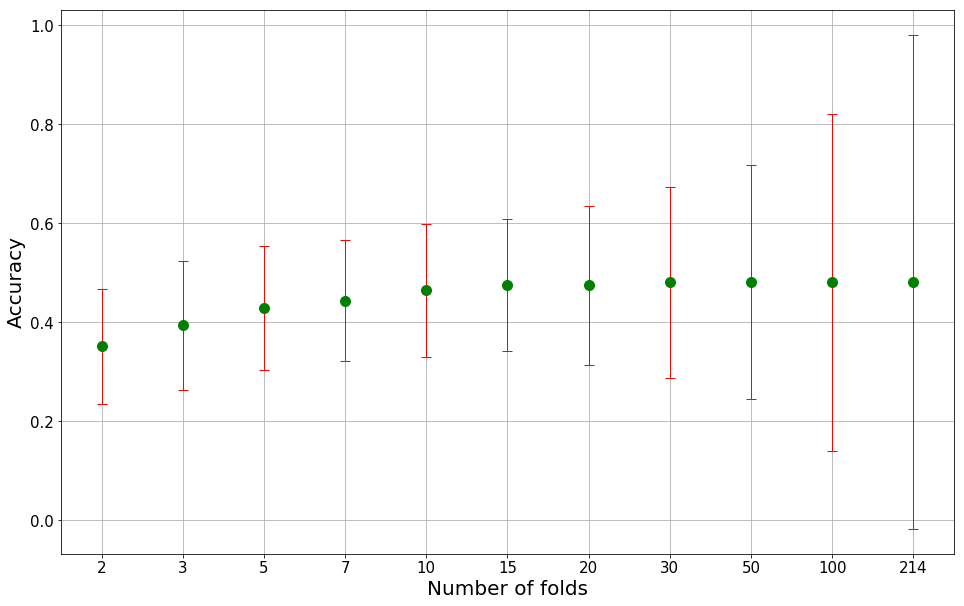

In [161]:
f = plt.figure(figsize=(16,10))
eb = plt.errorbar(range(len(avg_metrics['Number of Folds'])), 
                  avg_metrics['Accuracy Avg'],
                  avg_metrics['Accuracy Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)

plt.grid()
plt.ylabel('Accuracy', size=20)
plt.xlabel('Number of folds', size=20)
plt.xticks(range(len(avg_metrics['Number of Folds'])), avg_metrics['Number of Folds'], size=15)
plt.yticks(size=15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

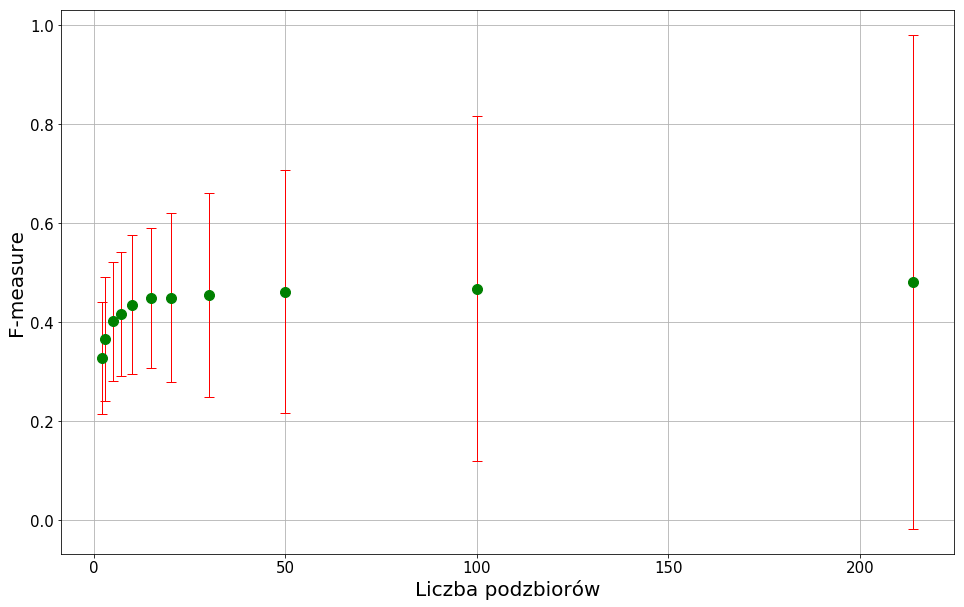

In [163]:
f = plt.figure(figsize=(16,10))
eb = plt.errorbar(avg_metrics['Number of Folds'], 
                  avg_metrics['F-measure Avg'],
                  avg_metrics['F-measure Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)
plt.grid()
plt.ylabel('F-measure', size=20)
plt.xlabel('Liczba podzbiorów', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

## Stratified CV

In [26]:
tested_str_kfolds = [2, 3, 5, 7, 10, 15]

In [27]:
%%time
str_results = []

for k in tqdm.tqdm(tested_str_kfolds):
    kfold_results = []
    for _ in range(nb_repetitions):
        strcv = CrossValidator(X, Y, 
                            lambda: GaussianNaiveBayes())
                            #lambda: NaiveBayes(zero_frequency_fill=True))
        metr_evals = strcv.stratified_kfold_cross_validation(k)
        kfold_results += metr_evals
    str_results.append(kfold_results)

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 4/6 [00:01<00:00,  2.25it/s]C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 5/6 [00:02<00:00,  1.92it/s]C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:0

Wall time: 3.81 s


In [23]:
len(str_results)

6

In [24]:
sum([len(r) for r in str_results])

1260

In [28]:
avg_str_metrics = pd.DataFrame({'Number of Folds':tested_str_kfolds})
avg_str_metrics

,Number of Folds
0,2
1,3
2,5
3,7
4,10
5,15


In [29]:
str_accuracies = [np.asarray([m.accuracy() for m in res]) for res in str_results]
avg_str_metrics['Accuracy Avg'] = [x.mean() for x in str_accuracies]
avg_str_metrics['Accuracy Std'] = [x.std() for x in str_accuracies]

In [30]:
str_precisions = [np.asarray([m.precision() for m in res]) for res in str_results]
avg_str_metrics['Precision Avg'] = [x.mean() for x in str_precisions]
avg_str_metrics['Precision Std'] = [x.std() for x in str_precisions]

C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
str_recalls = [np.asarray([m.recall() for m in res]) for res in str_results]
avg_str_metrics['Recall Avg'] = [x.mean() for x in str_recalls]
avg_str_metrics['Recall Std'] = [x.std() for x in str_recalls]

C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [32]:
str_fmeasures = [np.asarray([m.f_measure() for m in res]) for res in str_results]
avg_str_metrics['F-measure Avg'] = [x.mean() for x in str_fmeasures]
avg_str_metrics['F-measure Std'] = [x.std() for x in str_fmeasures]

C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mkosturek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [33]:
avg_str_metrics

,Number of Folds,Accuracy Avg,Accuracy Std,Precision Avg,Precision Std,Recall Avg,Recall Std,F-measure Avg,F-measure Std
0,2,0.372885,0.109975,0.464360,0.088889,0.372885,0.109975,0.347455,0.100626
1,3,0.395910,0.123483,0.448446,0.101182,0.395910,0.123483,0.364133,0.113655
2,5,0.426286,0.119559,0.465274,0.121946,0.426286,0.119559,0.399237,0.112407
3,7,0.452757,0.114987,0.472644,0.133703,0.452757,0.114987,0.418860,0.111075
4,10,0.462400,0.107604,0.477525,0.134670,0.462400,0.107604,0.426743,0.102242
5,15,0.473628,0.125350,0.460706,0.169421,0.473628,0.125350,0.431065,0.124590


In [34]:
print(avg_str_metrics.to_latex(float_format=lambda x: '{:.4f}'.format(x)))

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Number of Folds &  Accuracy Avg &  Accuracy Std &  Precision Avg &  Precision Std &  Recall Avg &  Recall Std &  F-measure Avg &  F-measure Std \\
\midrule
0 &                2 &        0.3729 &        0.1100 &         0.4644 &         0.0889 &      0.3729 &      0.1100 &         0.3475 &         0.1006 \\
1 &                3 &        0.3959 &        0.1235 &         0.4484 &         0.1012 &      0.3959 &      0.1235 &         0.3641 &         0.1137 \\
2 &                5 &        0.4263 &        0.1196 &         0.4653 &         0.1219 &      0.4263 &      0.1196 &         0.3992 &         0.1124 \\
3 &                7 &        0.4528 &        0.1150 &         0.4726 &         0.1337 &      0.4528 &      0.1150 &         0.4189 &         0.1111 \\
4 &               10 &        0.4624 &        0.1076 &         0.4775 &         0.1347 &      0.4624 &      0.1076 &         0.4267 &         0.1022 \\
5 &               15 &        0.4736 &   

(array([ 0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65]),
 <a list of 10 Text yticklabel objects>)

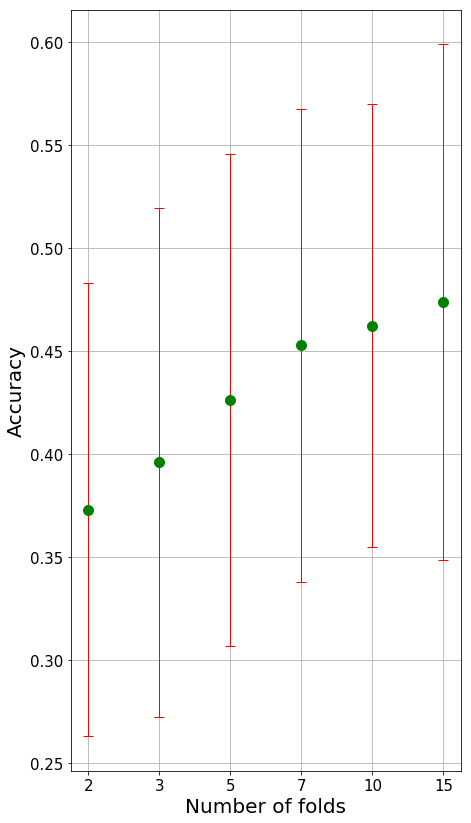

In [39]:
f = plt.figure(figsize=(7,14))
eb = plt.errorbar(range(len(avg_str_metrics['Number of Folds'])), 
                  avg_str_metrics['Accuracy Avg'],
                  avg_str_metrics['Accuracy Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)

plt.grid()
plt.ylabel('Accuracy', size=20)
plt.xlabel('Number of folds', size=20)
plt.xticks(range(len(avg_str_metrics['Number of Folds'])), avg_str_metrics['Number of Folds'], size=15)
plt.yticks(size=15)

(array([ 0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ]),
 <a list of 9 Text yticklabel objects>)

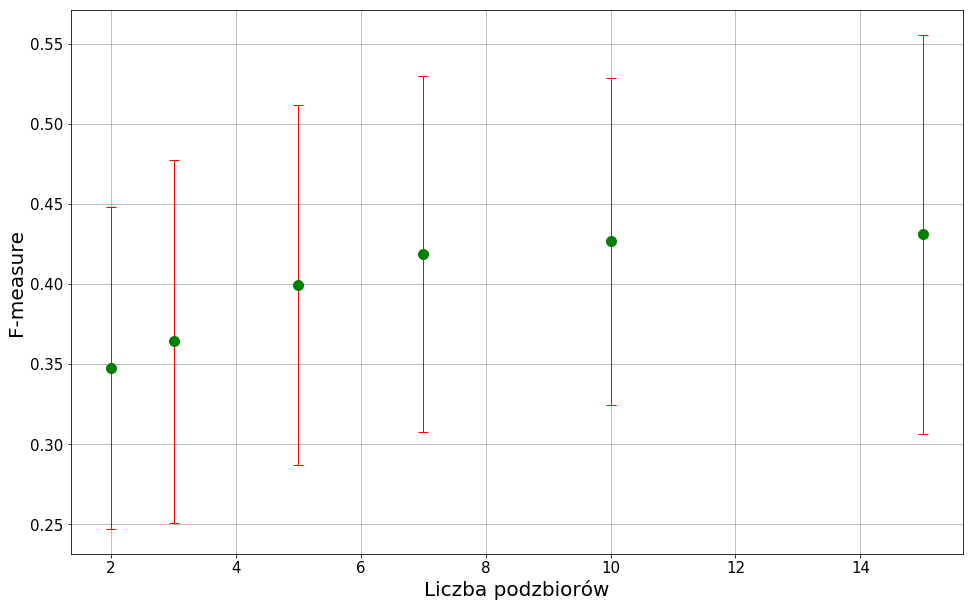

In [36]:
f = plt.figure(figsize=(16,10))
eb = plt.errorbar(avg_str_metrics['Number of Folds'], 
                  avg_str_metrics['F-measure Avg'],
                  avg_str_metrics['F-measure Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)
plt.grid()
plt.ylabel('F-measure', size=20)
plt.xlabel('Liczba podzbiorów', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

# Double Chart

[Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'5'),
 Text(0,0,'7'),
 Text(0,0,'10'),
 Text(0,0,'15')]

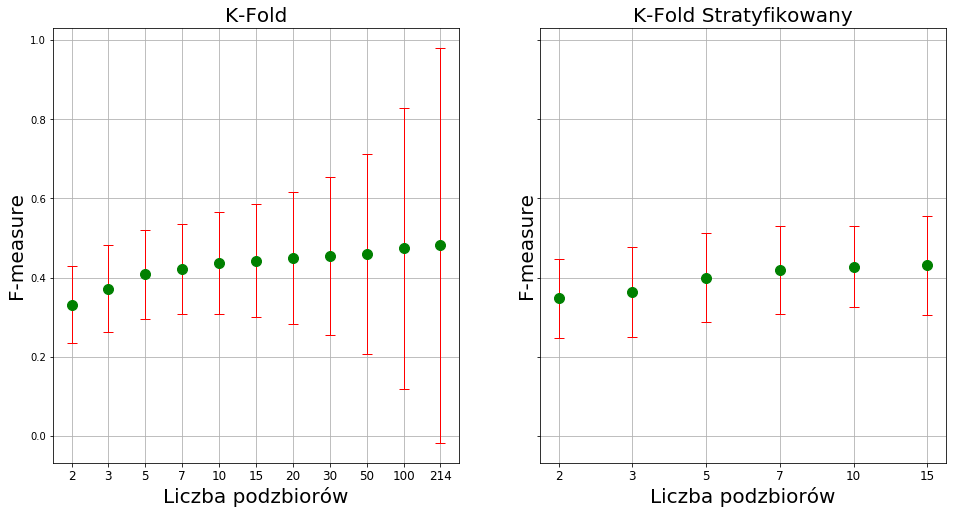

In [123]:
f, ax = plt.subplots(ncols=2, figsize=(16,8), sharey=True)
eb = ax[0].errorbar(range(len(tested_kfolds)), 
                  avg_metrics['F-measure Avg'],
                  avg_metrics['F-measure Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)

eb = ax[1].errorbar(range(len(tested_str_kfolds)), 
                  avg_str_metrics['F-measure Avg'],
                  avg_str_metrics['F-measure Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)
for i in range(2):
    ax[i].grid()
    ax[i].set_ylabel('F-measure', size=20)
    ax[i].set_xlabel('Liczba podzbiorów', size=20)
    
    
ax[0].set_title('K-Fold', size=20)
ax[0].set_xticks(range(len(tested_kfolds)))
ax[0].set_xticklabels(tested_kfolds, size=12)

ax[1].set_title('K-Fold Stratyfikowany', size=20)
ax[1].set_xticks(range(len(tested_str_kfolds)))
ax[1].set_xticklabels(tested_str_kfolds, size=12)
#ax[1].set_xtickslabels(tested_str_kfolds)#, size=15)

In [ ]:
f = plt.figure(figsize=(16,10))
eb = plt.errorbar(avg_str_metrics['Number of Folds'], 
                  avg_str_metrics['F-measure Avg'],
                  avg_str_metrics['F-measure Std'], 
                  color='green', marker='o', 
                  markersize=10, linewidth=0,
                  elinewidth=1, ecolor='r',
                  capsize=5, capthick=1)
plt.grid()
plt.ylabel('F-measure', size=20)
plt.xlabel('Liczba podzbiorów', size=20)
plt.xticks(size=15)
plt.yticks(size=15)